# Dam

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder

In [56]:
def value_counts_ratio(col_name, df=train_data, target_name='target'):
    """
    주어진 데이터프레임의 특정 열에 대해 각 값마다 타겟 변수의 비율과 갯수, 총 갯수를 출력하는 함수.

    Parameters:
    df (pd.DataFrame): 데이터프레임
    col_name (str): 열 이름
    target_name (str): 타겟 변수 이름
    """
    # 각 값마다 타겟 변수의 비율 계산
    value_counts = df.groupby(col_name)[target_name].value_counts(normalize=True).unstack().fillna(0)
    
    # 각 값마다 타겟 변수의 갯수 계산
    counts = df.groupby(col_name)[target_name].value_counts().unstack().fillna(0)
    
    # 각 값마다 총 갯수 계산
    total_counts = df[col_name].value_counts().rename('Total_Count')
    
    # 비율과 갯수를 합침
    result = value_counts.join(counts, lsuffix='_ratio', rsuffix='_count')
    
    # 총 갯수를 합침
    result = result.join(total_counts, on=col_name)
    
    # 출력 형식 조정
    result.index.name = 'variable'
    print(f"\n{col_name}별 {target_name} 비율 및 갯수\n")
    print(result.rename(columns=lambda x: x.split('_')[0]))

In [57]:
### 한글 및 부호 깨짐 방지
plt.rcParams['font.family'] = 'AppleGothic' #한글
mpl.rcParams['axes.unicode_minus'] = False #마이너스 부호

In [58]:
# csv 불러오기
train_data = pd.read_csv('trim_train_data.csv')

In [59]:
# 값의 종류가 1개이고 결측값이 없는 열을 제거하는 함수
def drop_single_value_columns(df):
    cols_to_drop = [col for col in df.columns if col != 'target' and df[col].nunique() == 1 and df[col].isnull().sum() == 0]
    df_dropped = df.drop(columns=cols_to_drop)
    return df_dropped, cols_to_drop

# train_data와 test_data에서 해당 열 제거 및 삭제된 열 이름과 개수 출력
# train_data, train_cols_dropped = drop_single_value_columns(train_data)
# test_data, test_cols_dropped = drop_single_value_columns(test_data)

# print("삭제된 train_data 열 이름:", train_cols_dropped)
# print("삭제된 train_data 열 개수:", len(train_cols_dropped))

# print("삭제된 test_data 열 이름:", test_cols_dropped)
# print("삭제된 test_data 열 개수:", len(test_cols_dropped))

In [60]:
# '_Dam'를 포함하는 열 이름 필터링
Process_Desc_col = train_data.filter(like='_Dam').columns

# 필터링된 열 이름 출력
print("<Dam 공정 관련 변수>")
for col in Process_Desc_col:
    print(col)

<Dam 공정 관련 변수>
Wip Line_Dam
Process Desc._Dam
Equipment_Dam
Model.Suffix_Dam
Workorder_Dam
Insp. Seq No._Dam
Insp Judge Code_Dam
CURE END POSITION X Collect Result_Dam
CURE END POSITION X Unit Time_Dam
CURE END POSITION X Judge Value_Dam
CURE END POSITION Z Collect Result_Dam
CURE END POSITION Z Unit Time_Dam
CURE END POSITION Z Judge Value_Dam
CURE END POSITION Θ Collect Result_Dam
CURE END POSITION Θ Unit Time_Dam
CURE END POSITION Θ Judge Value_Dam
CURE SPEED Collect Result_Dam
CURE SPEED Unit Time_Dam
CURE SPEED Judge Value_Dam
CURE STANDBY POSITION X Collect Result_Dam
CURE STANDBY POSITION X Unit Time_Dam
CURE STANDBY POSITION X Judge Value_Dam
CURE STANDBY POSITION Z Collect Result_Dam
CURE STANDBY POSITION Z Unit Time_Dam
CURE STANDBY POSITION Z Judge Value_Dam
CURE STANDBY POSITION Θ Collect Result_Dam
CURE STANDBY POSITION Θ Unit Time_Dam
CURE STANDBY POSITION Θ Judge Value_Dam
CURE START POSITION X Collect Result_Dam
CURE START POSITION X Unit Time_Dam
CURE START POSITION X 

### cure 좌표

In [61]:
# UV 경화 좌표 합치기

# Dam
# cure end
train_data['cure_end_position_Dam'] = (
    train_data['CURE END POSITION X Collect Result_Dam'].astype(str) + ',' +
    train_data['CURE END POSITION Z Collect Result_Dam'].astype(str) + ',' +
    train_data['CURE END POSITION Θ Collect Result_Dam'].astype(str)
)

# cure start
train_data['cure_start_position_Dam'] = (
    train_data['CURE START POSITION X Collect Result_Dam'].astype(str) + ',' +
    train_data['CURE START POSITION Z Collect Result_Dam'].astype(str) + ',' +
    train_data['CURE START POSITION Θ Collect Result_Dam'].astype(str)
)

# cure standby
train_data['cure_standby_position_Dam'] = (
    train_data['CURE STANDBY POSITION X Collect Result_Dam'].astype(str) + ',' +
    train_data['CURE STANDBY POSITION Z Collect Result_Dam'].astype(str) + ',' +
    train_data['CURE STANDBY POSITION Θ Collect Result_Dam'].astype(str)
)

In [62]:
# 고유값 조합에 따른 타깃값 개수 계산
grouped_counts = train_data.groupby(['cure_standby_position_Dam', 
                                     'cure_start_position_Dam',
                                     'cure_end_position_Dam',
                                     'target']).size().unstack(fill_value=0)

# 결과 출력
print("고유값 조합에 따른 타깃값 개수:")
print(grouped_counts)

# 타깃값 비율 계산
grouped_ratios = (grouped_counts.T / grouped_counts.sum(axis=1)).T * 100

# 결과 출력
print("\n고유값 조합에 따른 타깃값 비율 (%):")
print(grouped_ratios)

고유값 조합에 따른 타깃값 개수:
target                                                                   AbNormal  \
cure_standby_position_Dam cure_start_position_Dam cure_end_position_Dam             
1150,33.5,0               1030,33.5,-90           240.0,2.5,-90              1485   
                          280,33.5,90             1000.0,12.5,90              865   

target                                                                   Normal  
cure_standby_position_Dam cure_start_position_Dam cure_end_position_Dam          
1150,33.5,0               1030,33.5,-90           240.0,2.5,-90           23545  
                          280,33.5,90             1000.0,12.5,90          14611  

고유값 조합에 따른 타깃값 비율 (%):
target                                                                   AbNormal  \
cure_standby_position_Dam cure_start_position_Dam cure_end_position_Dam             
1150,33.5,0               1030,33.5,-90           240.0,2.5,-90          5.932881   
                          280,33.

-> cure 좌표는 타깃값에 영향을 딱히 주지 않는 듯하다..

### cure speed

In [63]:
# cure speed에 따른 타깃값 
value_counts_ratio('CURE SPEED Collect Result_Dam')


CURE SPEED Collect Result_Dam별 target 비율 및 갯수

          AbNormal    Normal  AbNormal  Normal  Total
variable                                             
70        0.059601  0.940399      2052   32377  34429
85        0.057388  0.942612       127    2086   2213
95        0.025157  0.974843         4     155    159
100       0.045036  0.954964        93    1972   2065
105       0.045122  0.954878        74    1566   1640


### discharged speed/volume/time

1. volume*time

In [64]:
# stage 3개의 평균 volume
train_data['average_volume_Dam'] = (train_data['Dispense Volume(Stage1) Collect Result_Dam'] + 
                                    train_data['Dispense Volume(Stage2) Collect Result_Dam'] + 
                                    train_data['Dispense Volume(Stage3) Collect Result_Dam']) / 3

In [65]:
# stage 3개의 평균 time
train_data['average_time_Dam'] = (train_data['DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam'] + 
                                  train_data['DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam'] + 
                                  train_data['DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam']) / 3

In [110]:
# 변수의 상관계수 계산
variables = ['DISCHARGED SPEED OF RESIN Collect Result_Dam', 'average_volume_Dam', 'average_time_Dam']

# 상관계수 행렬 계산
correlation_matrix = train_data[variables].corr()

# 상관계수 행렬 출력
print("상관계수 행렬:")
print(correlation_matrix)

상관계수 행렬:
                                              DISCHARGED SPEED OF RESIN Collect Result_Dam  \
DISCHARGED SPEED OF RESIN Collect Result_Dam                                      1.000000   
average_volume_Dam                                                                0.257512   
average_time_Dam                                                                 -0.025276   

                                              average_volume_Dam  \
DISCHARGED SPEED OF RESIN Collect Result_Dam            0.257512   
average_volume_Dam                                      1.000000   
average_time_Dam                                        0.774927   

                                              average_time_Dam  
DISCHARGED SPEED OF RESIN Collect Result_Dam         -0.025276  
average_volume_Dam                                    0.774927  
average_time_Dam                                      1.000000  


-> volume과 time이 상관관계가 높았다. 변수를 합쳐서 하나만 써도 괜찮을 것 같다. 
<br>-> volume/time 둘 다 stage2에서 5개 정도의 이상치가 발견되었는데(volume=0.4,0.41 / time=5.8,5.9 인 데이터), 모두 불량률이 높았던 AJX75334501-1.0 제품이었다. 여전히 불량률에는 제품 구분이 영향을 더 많이 미치는 것 같다.

In [67]:
# volume*time 파생변수
train_data['volume_time_multip_stage1_Dam'] = train_data['Dispense Volume(Stage1) Collect Result_Dam'] * train_data['DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam']
train_data['volume_time_multip_stage2_Dam'] = train_data['Dispense Volume(Stage2) Collect Result_Dam'] * train_data['DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam']
train_data['volume_time_multip_stage3_Dam'] = train_data['Dispense Volume(Stage3) Collect Result_Dam'] * train_data['DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam']

In [68]:
train_data['volume_time_multip_avg_Dam'] = (train_data['volume_time_multip_stage1_Dam'] + 
                                            train_data['volume_time_multip_stage2_Dam'] + 
                                            train_data['volume_time_multip_stage3_Dam']) / 3

-> volume이 특정 시간 동안의 양이라면 volume*time을 해서 하나의 변수로 합칠 수 있을 듯하다.

2. total time

In [101]:
# stage 3개의 total time
train_data['total_discharged_time_of_resin_Dam'] = (train_data['DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam'] + 
                                                    train_data['DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam'] + 
                                                    train_data['DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam'])

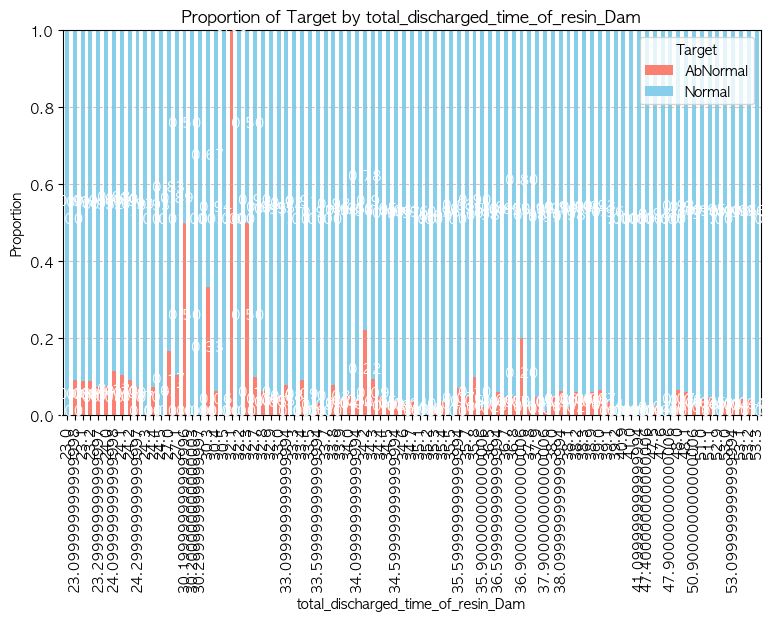

In [121]:
### total_discharged_time_of_resin_Dam에 따른 타깃값

# total_discharged_time_of_resin_Dam과 target 값에 따른 비율 계산
count_df = train_data.groupby(['total_discharged_time_of_resin_Dam', 'target']).size().unstack(fill_value=0)

# 각 total_discharged_time_of_resin_Dam에 대해 target 비율 계산
count_df = count_df.div(count_df.sum(axis=1), axis=0)

# 비율 시각화
count_df.plot(kind='bar', stacked=True, color=['salmon', 'skyblue'], figsize=(9, 5))

plt.xlabel('total_discharged_time_of_resin_Dam')
plt.ylabel('Proportion')
plt.title('Proportion of Target by total_discharged_time_of_resin_Dam')
plt.legend(title='Target', loc='upper right')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 그래프 위에 비율 표시
for i in range(count_df.shape[0]):
    for j in range(count_df.shape[1]):
        plt.text(i, count_df.iloc[i, j] / 2 + count_df.iloc[i, :j].sum(), f"{count_df.iloc[i, j]:.2f}", ha='center', color='white')

plt.show()

-> 레진 도포 시간이 짧으면 abnormal 비율이 높아지는 것으로 보인다.

### head position

##### head zero position

In [69]:
# Dam 노즐 zero 위치 Z좌표 드롭
#train_data.drop(columns='Head Zero Position Z Collect Result_Dam', inplace=True)
#test_data.drop(columns='Head Zero Position Z Collect Result_Dam', inplace=True)

'''
head_zero_position_YZ_Dam
300.0,265.0     20502
300.0,265.02    15247
303.5,265.0      4757
Name: count, dtype: int64
'''

'\nhead_zero_position_YZ_Dam\n300.0,265.0     20502\n300.0,265.02    15247\n303.5,265.0      4757\nName: count, dtype: int64\n'

-> Z좌표에 따라서는 차이가 없고, Y가 303.5인 데이터에서만 abnormal 비율이 조금 높게 나와서 Y좌표만 남겨도 괜찮을 듯

##### head normal coordinate

In [97]:
# 레진 도포 좌표 - 새로운 좌표에 대한 거리와 방향 계산
def calculate_vector(row, stage):
    x = row[f'HEAD NORMAL COORDINATE X AXIS(Stage{stage}) Collect Result_Dam']
    y = row[f'HEAD NORMAL COORDINATE Y AXIS(Stage{stage}) Collect Result_Dam']
    z = row[f'HEAD NORMAL COORDINATE Z AXIS(Stage{stage}) Collect Result_Dam']
    
    a = row['HEAD Standby Position X Collect Result_Dam']
    b = row['HEAD Standby Position Y Collect Result_Dam']
    c = row['HEAD Standby Position Z Collect Result_Dam']
    
    # 두 좌표 간의 거리 계산
    dx = x - a
    dy = y - b
    dz = z - c
    distance = np.sqrt(dx**2 + dy**2 + dz**2)
    
    # 단위 벡터 계산
    if distance != 0:  # 0으로 나누는 것을 방지
        unit_vector = (dx / distance, dy / distance, dz / distance)
    else:
        unit_vector = (0, 0, 0)  # 거리 0일 때 단위 벡터는 정의되지 않음
    
    # 방향과 거리를 결합하여 하나의 숫자로 표현
    # 각 성분에 거리 곱하기
    combined_value = distance * (unit_vector[0] + unit_vector[1] + unit_vector[2])
    
    return combined_value

# 새로운 값으로 DataFrame 열 생성
train_data['head_normal_vector_stage1_Dam'] = train_data.apply(calculate_vector, axis=1, stage=1)
train_data['head_normal_vector_stage2_Dam'] = train_data.apply(calculate_vector, axis=1, stage=2)
train_data['head_normal_vector_stage3_Dam'] = train_data.apply(calculate_vector, axis=1, stage=3)

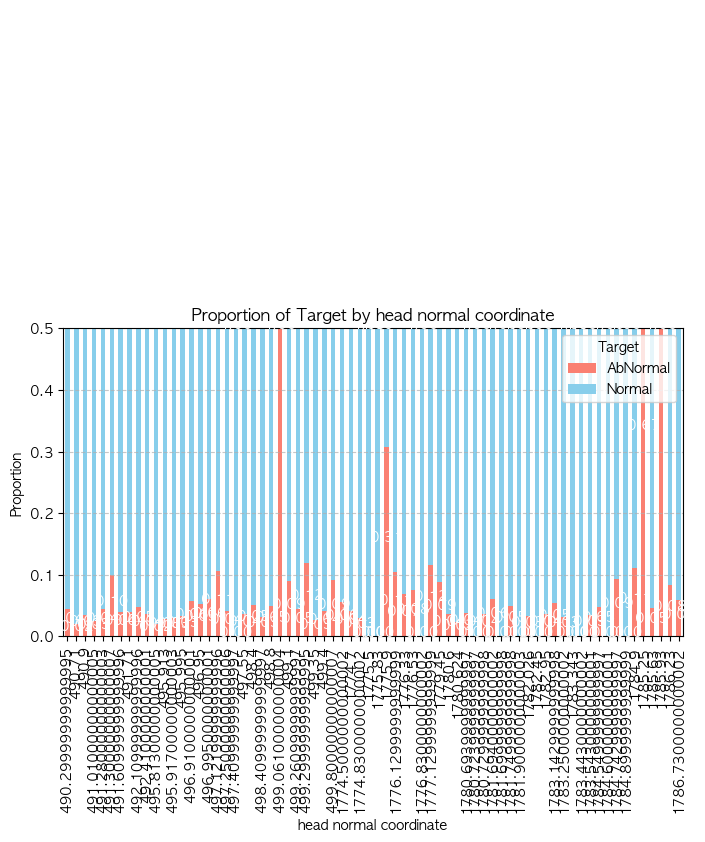

In [98]:
### 레진 도포 좌표에 따른 타깃값

# 레진 도포 좌표와 target 값에 따른 비율 계산
count_df = train_data.groupby(['head_normal_vector_stage3_Dam', 'target']).size().unstack(fill_value=0)

# 각 레진 도포 좌표에 대해 target 비율 계산
count_df = count_df.div(count_df.sum(axis=1), axis=0)

# 비율 시각화
count_df.plot(kind='bar', stacked=True, color=['salmon', 'skyblue'], figsize=(8, 4))

plt.xlabel('head normal coordinate')
plt.ylabel('Proportion')
plt.title('Proportion of Target by head normal coordinate')
plt.legend(title='Target', loc='upper right')
plt.ylim(0, 0.5)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 그래프 위에 비율 표시
for i in range(count_df.shape[0]):
    for j in range(count_df.shape[1]):
        plt.text(i, count_df.iloc[i, j] / 2 + count_df.iloc[i, :j].sum(), f"{count_df.iloc[i, j]:.2f}", ha='center', color='white')

plt.show()

-> 490대와 1700대 각각 양 극단에서 약간 비율이 높아지는 것 같기는 하다. 근데 큰 경향성은 없어보임.. abnormal 1인 것들은 데이터양이 매우 적음.

### circle & line
- circle: CID/Seg/Cluster R 수치
- line: CID/Seg/Cluster 토출 스피드

##### circle

In [139]:
# 동일 여부를 체크
train_data['comparison_result'] = (
    (train_data['Stage1 Circle1 Distance Speed Collect Result_Dam'] == train_data['Stage2 Circle1 Distance Speed Collect Result_Dam']) &
    (train_data['Stage2 Circle1 Distance Speed Collect Result_Dam'] == train_data['Stage3 Circle1 Distance Speed Collect Result_Dam'])
).astype(int)

In [140]:
train_data['comparison_result'].value_counts()

comparison_result
0    21882
1    18624
Name: count, dtype: int64

-> 각 stage 별로 circle 1,2,3,4는 모두 값이 같은데 stage 간에는 차이가 있음. stage별 하나씩 사용

In [144]:
# Stage1과 Stage2의 차이 절댓값 계산
train_data['Stage1_Stage2_Absolute_Difference'] = abs(train_data['Stage2 Circle1 Distance Speed Collect Result_Dam'] - train_data['Stage1 Circle1 Distance Speed Collect Result_Dam'])

# Stage2와 Stage3의 차이 절댓값 계산
train_data['Stage2_Stage3_Absolute_Difference'] = abs(train_data['Stage3 Circle1 Distance Speed Collect Result_Dam'] - train_data['Stage2 Circle1 Distance Speed Collect Result_Dam'])

# 두 개의 절댓값 차이를 더한 값 계산
train_data['Total_Absolute_Difference'] = (
    train_data['Stage1_Stage2_Absolute_Difference'] + 
    train_data['Stage2_Stage3_Absolute_Difference']
)

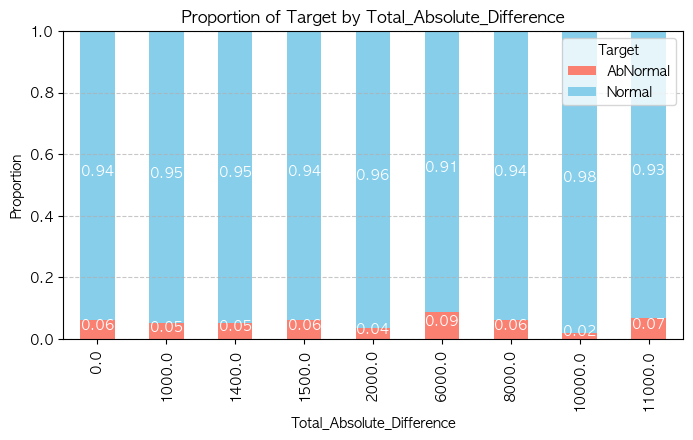

In [150]:
# Total_Absolute_Difference와 target 값에 따른 비율 계산
count_df = train_data.groupby(['Total_Absolute_Difference', 'target']).size().unstack(fill_value=0)
count_df = count_df.div(count_df.sum(axis=1), axis=0)

# 비율 시각화
count_df.plot(kind='bar', stacked=True, color=['salmon', 'skyblue'], figsize=(8, 4))

plt.xlabel('Total_Absolute_Difference')
plt.ylabel('Proportion')
plt.title('Proportion of Target by Total_Absolute_Difference')
plt.legend(title='Target', loc='upper right')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 그래프 위에 비율 표시
for i in range(count_df.shape[0]):
    for j in range(count_df.shape[1]):
        plt.text(i, count_df.iloc[i, j] / 2 + count_df.iloc[i, :j].sum(), f"{count_df.iloc[i, j]:.2f}", ha='center', color='white')

plt.show()

-> stage1-2, stage2-3, total difference의 타깃값 분포가 동일해서 total difference만 써도 될듯

##### line

In [186]:
# stage1 (같으면 그 값, 다르면 diff)
train_data['stage1_line_distance_speed_Dam'] = train_data.apply(
    lambda row: row['Stage1 Line1 Distance Speed Collect Result_Dam'] 
    if (row['Stage1 Line1 Distance Speed Collect Result_Dam'] == 
        row['Stage1 Line2 Distance Speed Collect Result_Dam'] == 
        row['Stage1 Line3 Distance Speed Collect Result_Dam'] == 
        row['Stage1 Line4 Distance Speed Collect Result_Dam']) else 'diff',
    axis=1
)

In [187]:
value_counts_ratio('stage1_line_distance_speed_Dam', df=train_data)


stage1_line_distance_speed_Dam별 target 비율 및 갯수

          AbNormal    Normal  AbNormal  Normal  Total
variable                                             
4000.0    0.041707  0.958293       256    5882   6138
5000.0    0.062232  0.937768       305    4596   4901
5800.0    0.032407  0.967593        42    1254   1296
6000.0    0.048435  0.951565        65    1277   1342
6200.0    0.052817  0.947183        15     269    284
6500.0    0.048663  0.951337       586   11456  12042
9000.0    0.084133  0.915867       833    9068   9901
diff      0.053890  0.946110       248    4354   4602


In [188]:
# stage2 (같으면 그 값, 다르면 diff)
train_data['stage2_line_distance_speed_Dam'] = train_data.apply(
    lambda row: row['Stage2 Line1 Distance Speed Collect Result_Dam'] 
    if (row['Stage2 Line1 Distance Speed Collect Result_Dam'] == 
        row['Stage2 Line2 Distance Speed Collect Result_Dam'] == 
        row['Stage2 Line3 Distance Speed Collect Result_Dam'] == 
        row['Stage2 Line4 Distance Speed Collect Result_Dam']) else 'diff',
    axis=1
)

In [189]:
value_counts_ratio('stage2_line_distance_speed_Dam', df=train_data)


stage2_line_distance_speed_Dam별 target 비율 및 갯수

          AbNormal    Normal  AbNormal  Normal  Total
variable                                             
4000.0    0.040918  0.959082       164    3844   4008
5000.0    0.042191  0.957809        57    1294   1351
5300.0    0.050803  0.949197       269    5026   5295
5500.0    0.037517  0.962483       226    5798   6024
6500.0    0.056776  0.943224       305    5067   5372
8000.0    0.063636  0.936364        28     412    440
9000.0    0.072740  0.927260       860   10963  11823
12000.0   0.086480  0.913520       300    3169   3469
diff      0.051762  0.948238       141    2583   2724


In [190]:
# stage3 (같으면 그 값, 다르면 diff)
train_data['stage3_line_distance_speed_Dam'] = train_data.apply(
    lambda row: row['Stage3 Line1 Distance Speed Collect Result_Dam'] 
    if (row['Stage3 Line1 Distance Speed Collect Result_Dam'] == 
        row['Stage3 Line2 Distance Speed Collect Result_Dam'] == 
        row['Stage3 Line3 Distance Speed Collect Result_Dam'] == 
        row['Stage3 Line4 Distance Speed Collect Result_Dam']) else 'diff',
    axis=1
)

In [191]:
value_counts_ratio('stage3_line_distance_speed_Dam', df=train_data)


stage3_line_distance_speed_Dam별 target 비율 및 갯수

          AbNormal    Normal  AbNormal  Normal  Total
variable                                             
4000.0    0.041707  0.958293       256    5882   6138
5000.0    0.062232  0.937768       305    4596   4901
5800.0    0.050803  0.949197       269    5026   5295
6000.0    0.049192  0.950808        70    1353   1423
6200.0    0.052817  0.947183        15     269    284
6500.0    0.048570  0.951430       581   11381  11962
9000.0    0.084133  0.915867       833    9068   9901
diff      0.034884  0.965116        21     581    602


In [193]:
# total stage (같으면 그 값, 다르면 diff)
train_data['total_line_distance_speed_Dam'] = train_data.apply(
    lambda row: row['stage1_line_distance_speed_Dam'] 
    if (row['stage1_line_distance_speed_Dam'] == 
        row['stage2_line_distance_speed_Dam'] == 
        row['stage3_line_distance_speed_Dam']) else 'diff',
    axis=1
)

In [194]:
value_counts_ratio('total_line_distance_speed_Dam', df=train_data)


total_line_distance_speed_Dam별 target 비율 및 갯수

          AbNormal    Normal  AbNormal  Normal  Total
variable                                             
4000.0    0.040918  0.959082       164    3844   4008
6500.0    0.056786  0.943214       305    5066   5371
9000.0    0.083245  0.916755       548    6035   6583
diff      0.054311  0.945689      1333   23211  24544


### thickness

In [204]:
# 세 개 컬럼의 평균을 계산하여 새로운 컬럼 생성
train_data['average_thickness_Dam'] = train_data[['THICKNESS 1 Collect Result_Dam', 
                                                  'THICKNESS 2 Collect Result_Dam', 
                                                  'THICKNESS 3 Collect Result_Dam']].mean(axis=1)

In [211]:
value_counts_ratio('average_thickness_Dam', df=train_data)


average_thickness_Dam별 target 비율 및 갯수

           AbNormal    Normal  AbNormal  Normal  Total
variable                                              
-0.088667  0.041855  0.958145        37     847    884
-0.052667  0.044876  0.955124        74    1575   1649
-0.025667  0.074689  0.925311        72     892    964
-0.010667  0.051796  0.948204        62    1135   1197
-0.002333  0.016000  0.984000         2     123    125
 0.000000  0.059036  0.940964      2091   33328  35419
 0.011000  0.040000  0.960000         6     144    150
 0.022000  0.050847  0.949153         6     112    118
